In [1]:
from packaging import version
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from scipy.stats import norm
%matplotlib notebook

In [24]:
def draw_metrics(dfs, fname, tags, tag_names, y_label, classes, threshs=None):
    # f, axes = plt.subplots(1, 3, sharey=True, figsize=(13,4))
    # f, axes = plt.subplots(2, 2, sharey=True, figsize=(7,5))
    f, axes = plt.subplots(2, 3, sharey=True, figsize=(7,5))
    base_run = "tensorboard"

    for i in range(2):
        df = dfs[i]
        for j, cls in enumerate(classes):
            for k, (tag, tname) in enumerate(zip(tags, tag_names)):
                run = base_run + "/" + tag + "/" + cls
                steps = df[df.run == run].step
                if tag == 'rcnn_roi_pl_gt_metrics_cls/pred_fp_ratio':  # change fp ratio to precision
                    values = 1 - df[df.run == run].value
                    smooth_values = 1 - df[df.run == run].ewm(alpha=0.2).mean().value
                else:
                    values = df[df.run == run].value
                    smooth_values = df[df.run == run].ewm(alpha=0.2).mean().value
                if j == 0:
                    lines = axes[i, j].plot(steps, values, alpha=0.2)
                    axes[i, j].plot(steps, smooth_values, label=tname, color=lines[0].get_color())
                    axes[i, j].set_ylabel(y_label)
                else:
                    lines = axes[i, j].plot(steps, values, alpha=0.2)
                    axes[i, j].plot(steps, smooth_values, color=lines[0].get_color())

            axes[i, j].yaxis.set_tick_params(labelleft=True)

            if j == 0:
                if threshs is not None:
                    axes[i, j].axhline(y=threshs[i, j], linestyle="dashed", label="$\\tau$")
            else:
                if threshs is not None:
                    axes[i, j].axhline(y=threshs[i, j], linestyle="dashed")
                axes[i, j].yaxis.set_tick_params(labelleft=False)
            if i == 0:
                axes[i, j].set_title(cls)
                axes[i, j].xaxis.set_tick_params(labelbottom=False)
            if i == 1:
                axes[i, j].set_xlabel("Training iterations")

    axes[0, 0].legend()
    f.tight_layout()
    f.subplots_adjust(wspace=0.02, hspace=0.02)
    f.savefig(fname=fname, transparent=False, bbox_inches='tight')

In [27]:
# experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
# df = experiment.get_scalars()
# df.to_csv(f"metrics_{experiment_name}.csv", index=False)


# --------------- Ablation 1 ---------------
plt.style.use('seaborn')
exp_id_ab1_default, exp_name_ab1_default = "dTrxKmgMRQK122Hm1cmaPA", "ablation1_bs8_split_1_1_trial_3_5802d99"
exp_id_ab1_ours, exp_name_ab1_ours = "f5nMZ6K9SySkIYEEP1J2jw", "st_fg_uc_bg_pl_o_95_85_85_s_0_26729b3"
df_ab1_default = pd.read_csv(f"metrics_{exp_name_ab1_default}.csv")
df_ab1_ours = pd.read_csv(f"metrics_{exp_name_ab1_ours}.csv")
dfs = [df_ab1_default, df_ab1_ours]
classes = ["Car", "Pedestrian", "Cyclist"]
threshs = np.array([[0.75, 0.75, 0.75], [0.65, 0.45, 0.4]])

# tags = ["rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_tp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fp", "rcnn_roi_pl_gt_metrics_cls/pred_ious_wrt_pl_fn"]
# y_label = "ROI IoU wrt. pseudo-labels"
# tag_names = ["True Positive ROIs", "False Positive ROIs", "False Negative ROIs"]
# fname = f"roi_iou_wrt_pl_ab1_default_{exp_name_ab1_default}.pdf"
# draw_metrics(dfs=dfs, fname=fname, tags=tags, tag_names=tag_names, y_label=y_label, classes=classes, threshs=threshs)

tags = ["rcnn_roi_pl_gt_metrics_cls/pred_tp_rate", "rcnn_roi_pl_gt_metrics_cls/pred_fp_ratio"]
tag_names = ["Recall", "Precision"]
fname = f"recall_precision_{exp_name_ab1_default}.pdf"
y_label = "Ratio"
draw_metrics(dfs=dfs, fname=fname, tags=tags, tag_names=tag_names, y_label=y_label, classes=classes)
# --------------- Etc. ---------------
# tags = ["rcnn_roi_pl_gt _metrics_cls/pred_weight_tp", "rcnn_roi_pl_gt_metrics_cls/pred_weight_fp", "rcnn_roi_pl_gt_metrics_cls/pred_weight_fn"]
# y_label = "Mean assignment weight"
# draw_metrics(fname=f"pred_weights_tp_fp_fn_{experiment_name}.png", tags=tags, thresholds=None, y_label=y_label)

<IPython.core.display.Javascript object>

In [2]:
# exp_name = "rev-uc-bg_bs8_split_2_1_trial_1_293070a"
# exp_id = "3N9Xh2gMQhGy3FawQTwNiA"
# experiment = tb.data.experimental.ExperimentFromDev(exp_id)
# df = experiment.get_scalars()
# df.to_csv(f"metrics_{exp_name}.csv", index=False)

In [28]:
data = np.load("/home/farzad/OpenPCDet/scores.pkl", allow_pickle=True)
df = pd.DataFrame.from_dict(data)
# df = pd.read_csv("metrics_rev-uc-bg_bs8_split_2_1_trial_1_293070a.csv")
df

,iou_roi_pl,iou_roi_gt,pred_scores,weights,teacher_scores,class_labels,iteration
0,0.892533,0.564606,0.999532,1.000000,0.999776,1,0.0
1,0.842074,0.586626,0.997247,1.000000,0.999027,1,0.0
2,0.815203,0.632871,0.976664,1.000000,0.999443,1,0.0
3,0.756168,0.668692,0.999448,1.000000,0.999722,1,0.0
4,0.707624,0.586877,0.932739,1.000000,0.993906,1,0.0
...,...,...,...,...,...,...,...
933499,0.000000,0.000000,0.991575,0.057240,0.942760,2,7349.0
933500,0.000000,0.000000,0.885602,0.065871,0.934129,2,7349.0
933501,0.000000,0.000000,0.969246,0.076300,0.923700,2,7349.0
933502,0.000000,0.000000,0.625221,0.116217,0.883783,2,7349.0


In [22]:
window_size = 250

In [80]:
cls_df = df[(df['class_labels'] == 2) & (df['iou_roi_pl'] > 0.25)]
max_iter = cls_df['iteration'].max().astype(int)
cls_df

,iou_roi_pl,iou_roi_gt,pred_scores,weights,teacher_scores,class_labels,iteration
10,0.554098,0.0,0.768739,1.0,0.927131,2,0.0
24,0.371299,0.0,0.460201,1.0,0.862060,2,0.0
142,0.591024,0.0,0.332696,1.0,0.968207,2,1.0
146,0.568191,0.0,0.484105,1.0,0.082378,2,1.0
147,0.561561,0.0,0.443242,1.0,0.842608,2,1.0
...,...,...,...,...,...,...,...
933486,0.561368,0.0,0.976609,1.0,0.982627,2,7349.0
933487,0.558954,0.0,0.902505,1.0,0.755776,2,7349.0
933488,0.558879,0.0,0.871308,1.0,0.965078,2,7349.0
933489,0.557194,0.0,0.989541,1.0,0.819365,2,7349.0


In [81]:
percent = 0.1

lower_bound_iou: 0.2947503561487256


<IPython.core.display.Javascript object>


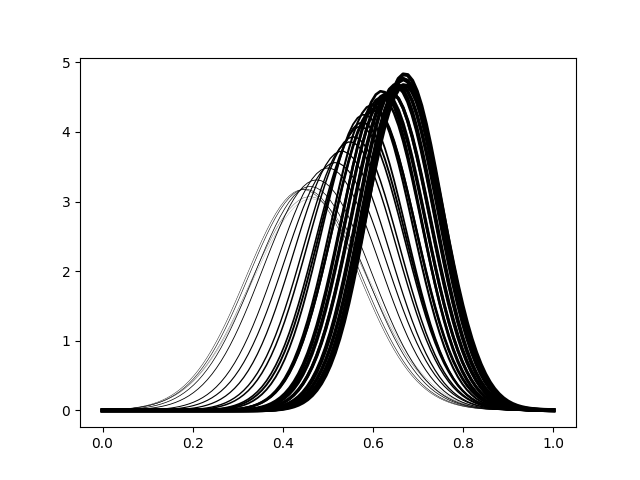

lower_bound_iou: 0.2929690566876169
lower_bound_iou: 0.2832405579764251
lower_bound_iou: 0.28856812867327963
lower_bound_iou: 0.3017721704194385
lower_bound_iou: 0.32002620168434426
lower_bound_iou: 0.3530230808566249
lower_bound_iou: 0.3725839320602591
lower_bound_iou: 0.3933497954227714
lower_bound_iou: 0.41629620081976926
lower_bound_iou: 0.4259739226293372
lower_bound_iou: 0.44622242986330307
lower_bound_iou: 0.4597031808113017
lower_bound_iou: 0.4522865150383556
lower_bound_iou: 0.48030223452932985
lower_bound_iou: 0.48472057063592733
lower_bound_iou: 0.48393650048597203
lower_bound_iou: 0.5042376282630071
lower_bound_iou: 0.5074923511745532
lower_bound_iou: 0.5132762195727425
lower_bound_iou: 0.5154390622533972
lower_bound_iou: 0.5266632401619449
lower_bound_iou: 0.5272689775833881
lower_bound_iou: 0.5403102716570781
lower_bound_iou: 0.542025159369132
lower_bound_iou: 0.5505600208894494
lower_bound_iou: 0.5586086942698818
lower_bound_iou: 0.5645571830250835
lower_bound_iou: 0.560

In [84]:
roi_ious_pl_windows = []
mus, sigmas = [], []
for step, i in enumerate(range(0, max_iter, window_size)):
    iter_mask = (i <= cls_df['iteration']) & (cls_df['iteration'] < i + window_size)  
    roi_ious_pl = cls_df[iter_mask]['iou_roi_pl']
    mu, sigma = norm.fit(roi_ious_pl)
    lower_bound_iou = norm.ppf(percent, loc=mu, scale=sigma)
    print('lower_bound_iou:', lower_bound_iou)
    mus.append(mu)
    sigmas.append(sigma)
    roi_ious_pl_windows.append(roi_ious_pl)
#     plt.hist(roi_ious_pl, density=True, alpha=0.6, color='g')
    x = np.linspace(0, 1, 100)
    p = norm.pdf(x, mu, sigma)
    width = step * 0.1 + 0.1
    plt.plot(x, p, 'k', linewidth=width)

In [83]:
plt.scatter(cls_df['iteration'].astype(int), cls_df['iou_roi_pl'], s=0.1, alpha=0.5)

In [ ]:
cls_df = df[(df['class_labels'] == 2) & (df['iou_roi_pl'] > 0.25)]
plt.scatter(cls_df['iteration'].astype(int), cls_df['iou_roi_pl'] , s=.1)